In [ ]:
# IMPORTING PYTHON LIBRARIES AND LOADING THE DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 14)

In [6]:
# Checking for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [7]:
# Removing unwanted columns with null values

df.info
df.drop(['Status','Unnamed'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [8]:
# Finding null values in the data

pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
rows_with_nulls=df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(rows_with_nulls)

Rows with null values:
Empty DataFrame
Columns: [User_ID, Cust_name, Product_ID, Gender, Age, Marital_Status, State, Zone, Occupation, Product_Category, Orders, Amount]
Index: []


In [11]:
# Filling the null values with mean value of column Amount





df['Amount']=df.groupby('Product_Category')['Amount'].transform(lambda x:x.fillna(x.mean()))

In [13]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df['Amount']=df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes

dtype('int32')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [19]:
# Renaming Columns



df.rename(columns={'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [20]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [21]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [ ]:
# Now categorizing people based on their age into different groups

In [26]:
def categorize_age(age):
    if age<=17:
        return '0-17'
    elif age<=25:
        return'18-25'
    elif age<=35:
        return'26-35'
    elif age<=45:
        return'36-45'
    elif age<=50:
        return'45-50'
    elif age<=55:
         return'51-55'
    else:
        return'55+'

df['Age_Group']=df['Age'].apply(categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

In [ ]:
# Visualization using Count plot

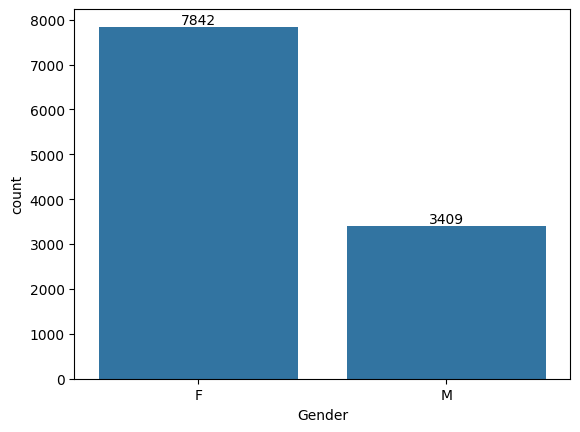

In [34]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Using count plot for maximum amount spent by each gender

<Axes: xlabel='Gender', ylabel='Amount'>

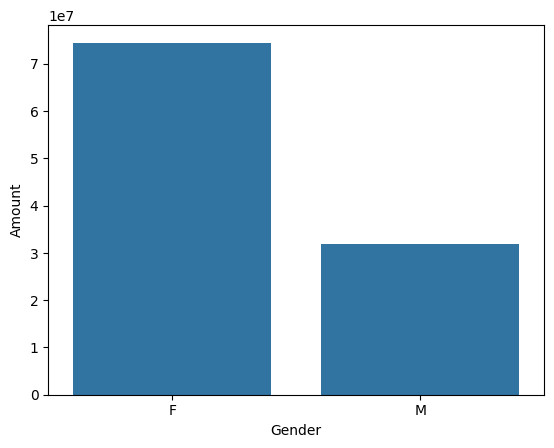

In [37]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

In [ ]:
#from the above graph its clear that most of the buyers are females

AGE

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

In [ ]:
# visualization for different age group category using countplot

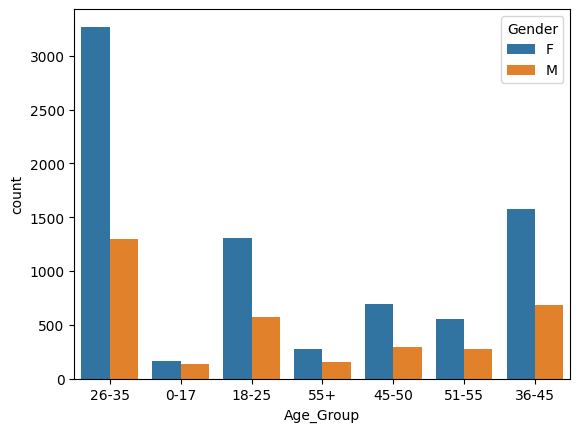

In [39]:
ax=sns.countplot(data=df,x='Age_Group',hue='Gender')

In [ ]:
# using countplot visualizing most amount spent by different age Group


<Axes: xlabel='Age_Group', ylabel='Amount'>

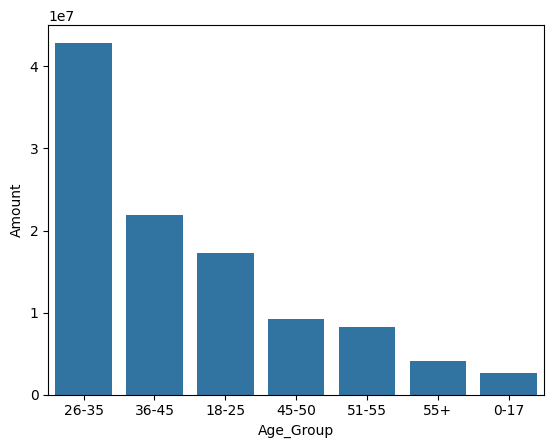

In [42]:
sales_age=df.groupby(['Age_Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age_Group',y='Amount',data=sales_age)

From the graph its clear that most of the buyers are of age group 26-35

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

In [ ]:
# visualization for state wise orders using Barplot

<Axes: xlabel='State', ylabel='Orders'>

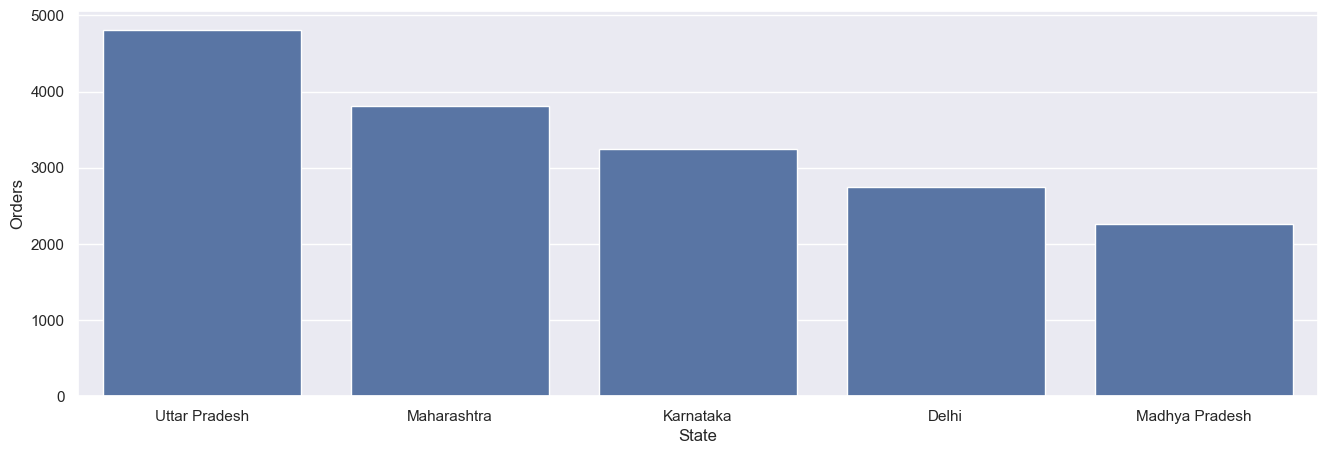

In [48]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

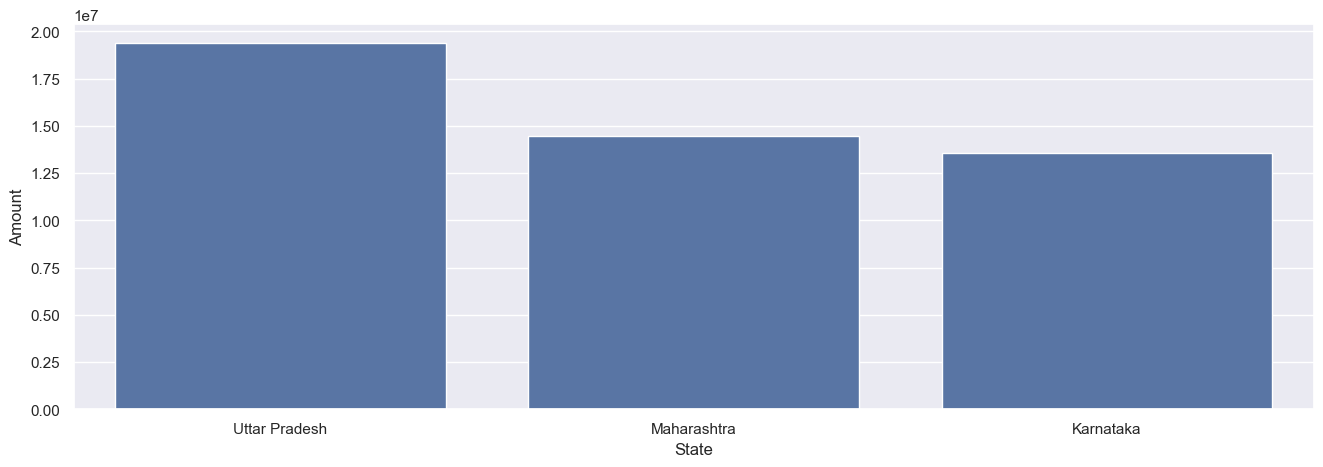

In [50]:
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(3)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

From the above its clear that most of the orders & total amount are from UP,Maharashtra and Karnataka respectively

MARITAL STATUS

In [ ]:
#countplot for buyers by Marital status

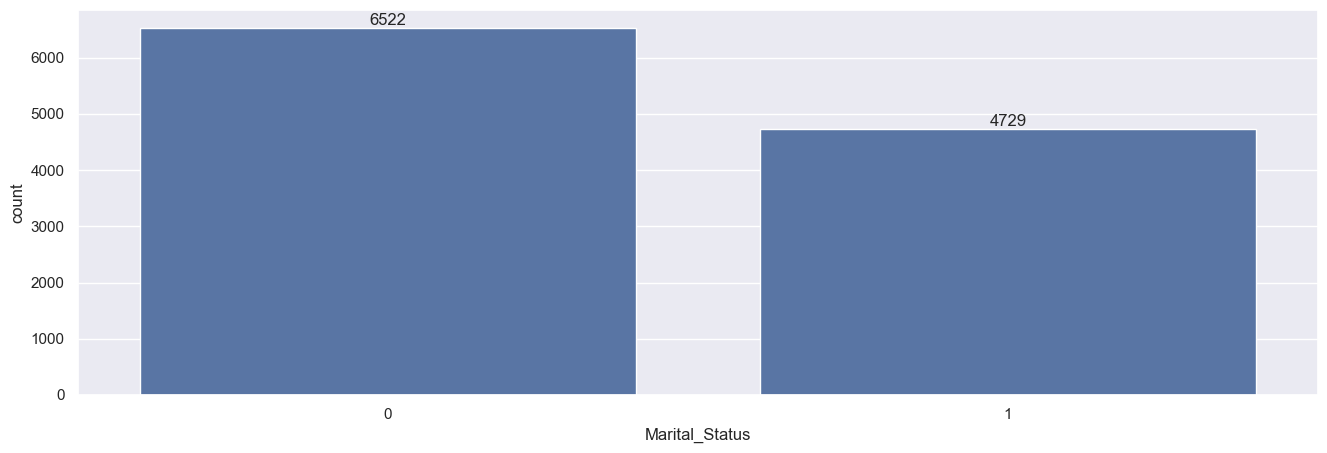

In [51]:
ax=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

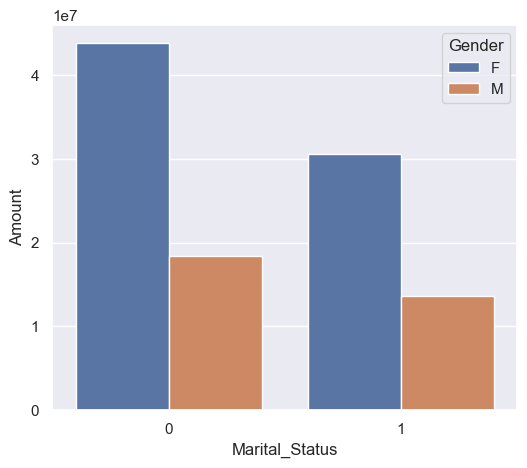

In [54]:
sales_state=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')

From the above graph it shows that most of the buyers are unmarried women

In [56]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

OCCUPATION

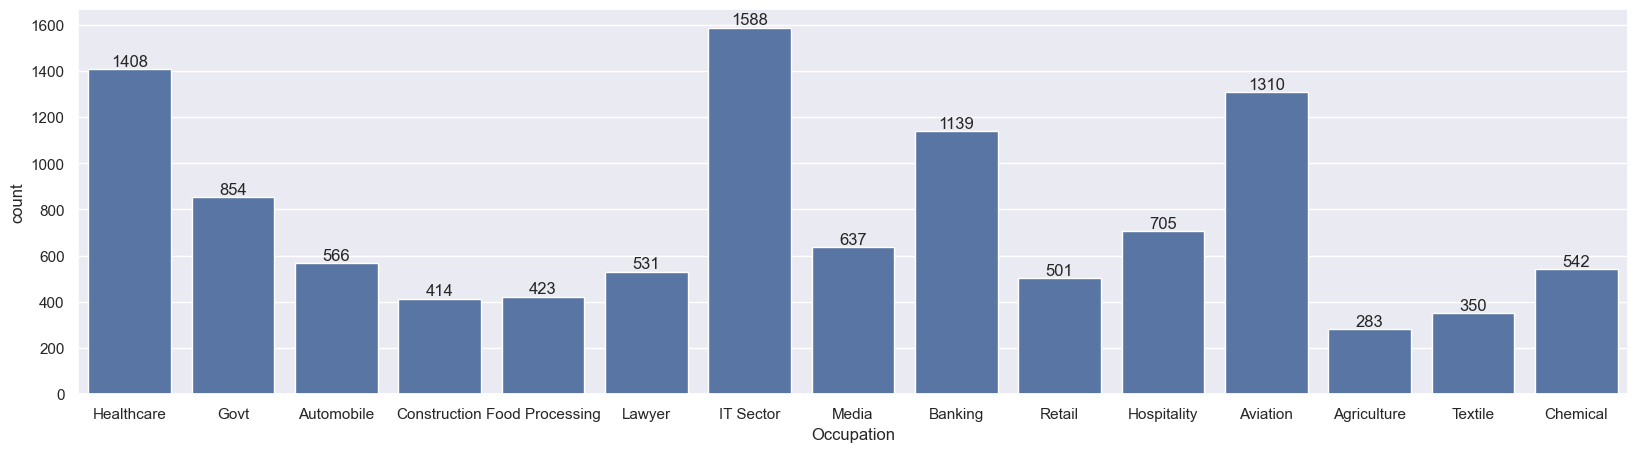

In [57]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

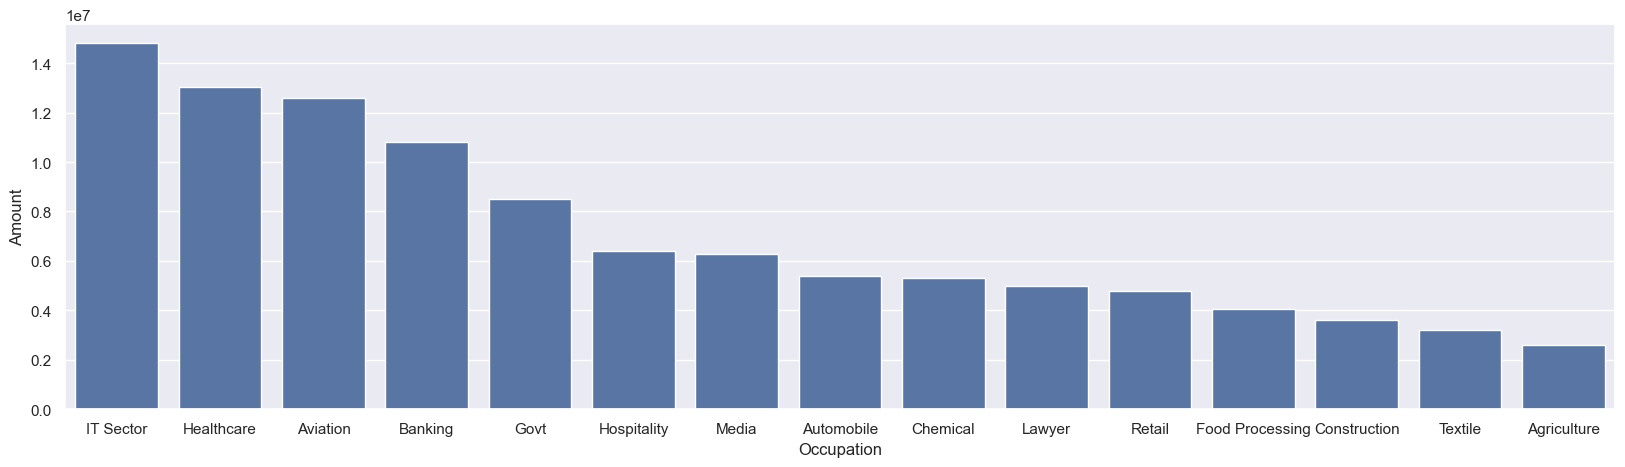

In [59]:
sales_state=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_state)

From the graph it shows that most the buyers are from IT,Healthcare& Aviation respectively

In [ ]:
# countplot for product category

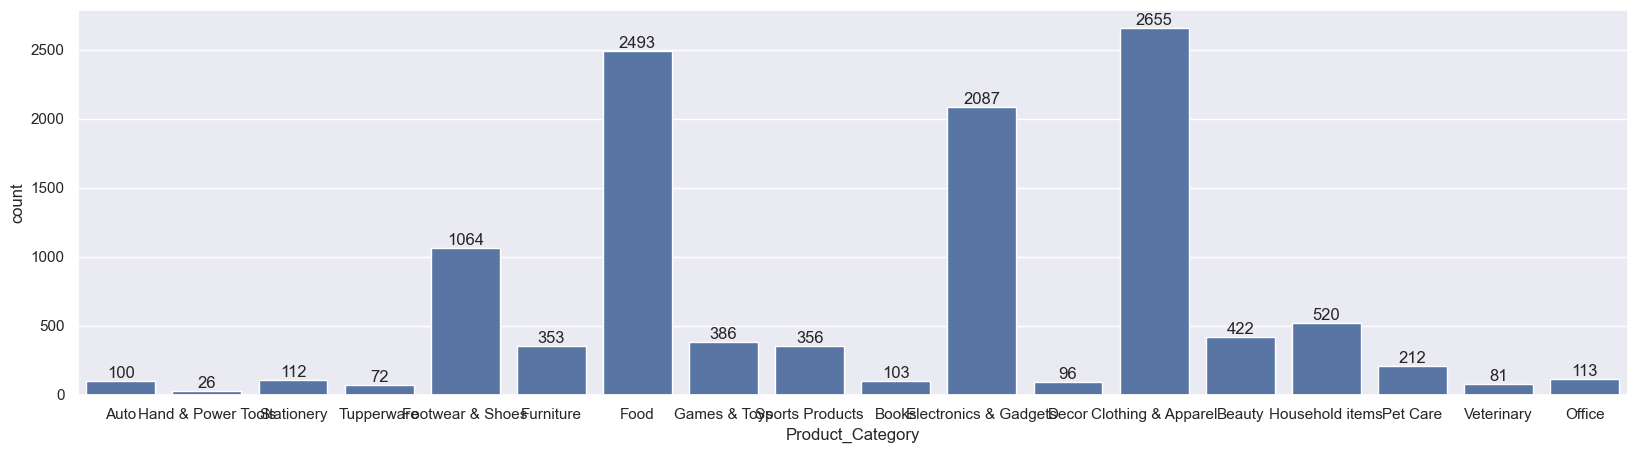

In [63]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

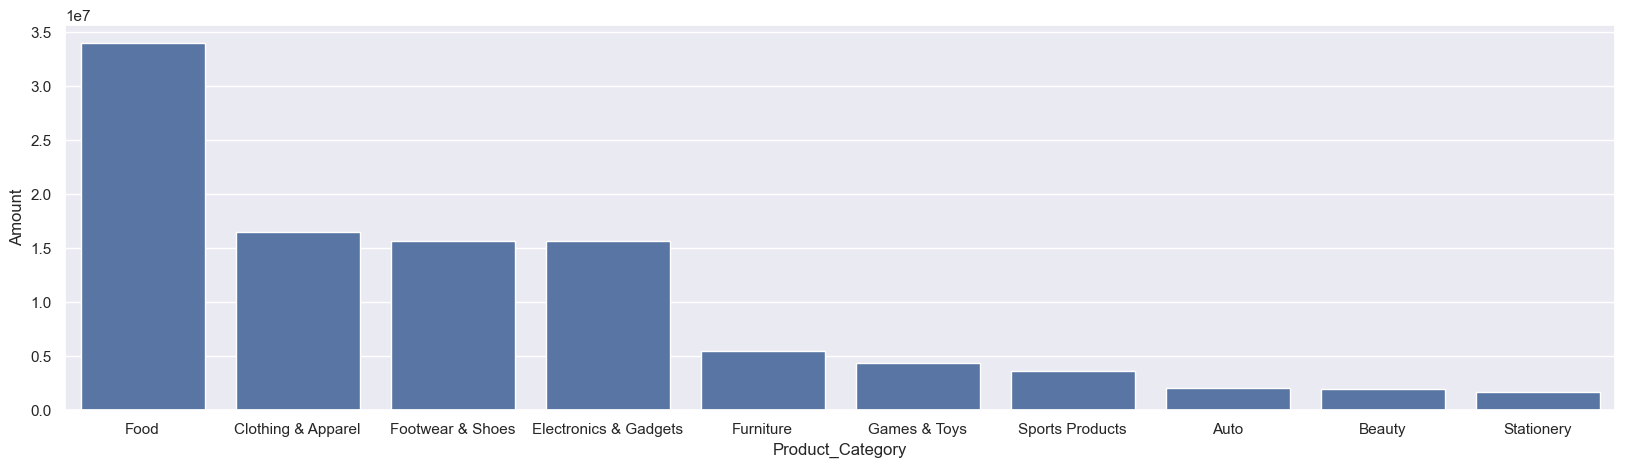

In [62]:
sales_state=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=sales_state)

From the graph we can see that most of the sold products are from Food,Clothing and Electronics category

In [64]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

In [ ]:
#barplot for different products by maximum orders

<Axes: xlabel='Product_ID', ylabel='Orders'>

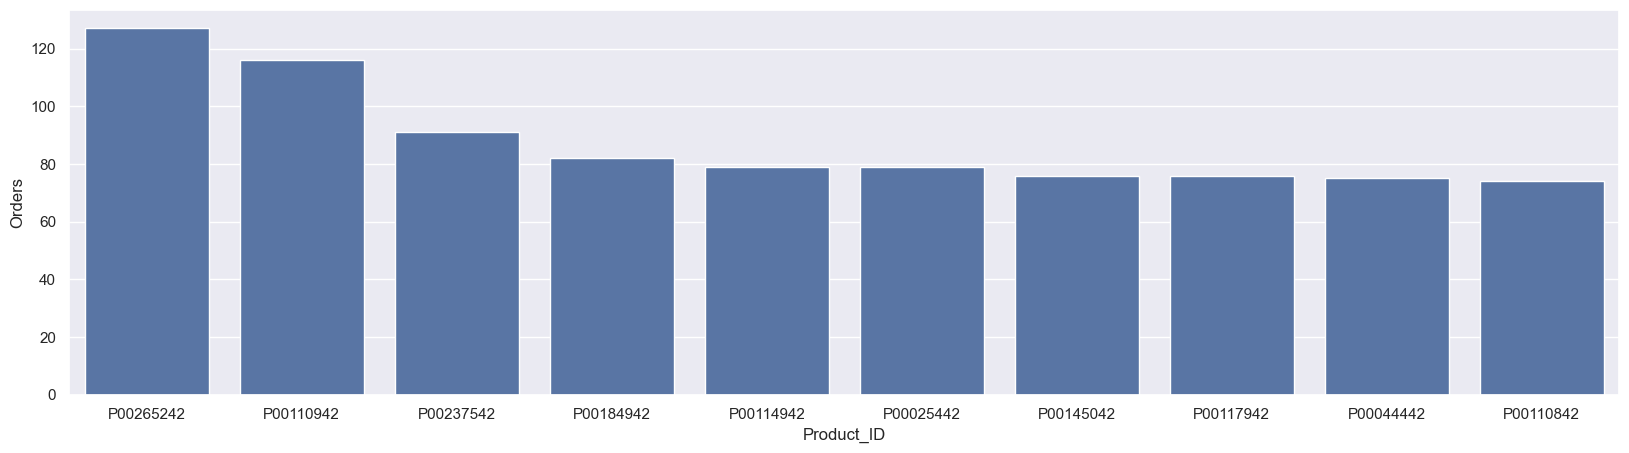

In [65]:
sales_state=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID',y='Orders',data=sales_state)

<Axes: xlabel='Product_ID', ylabel='Amount'>

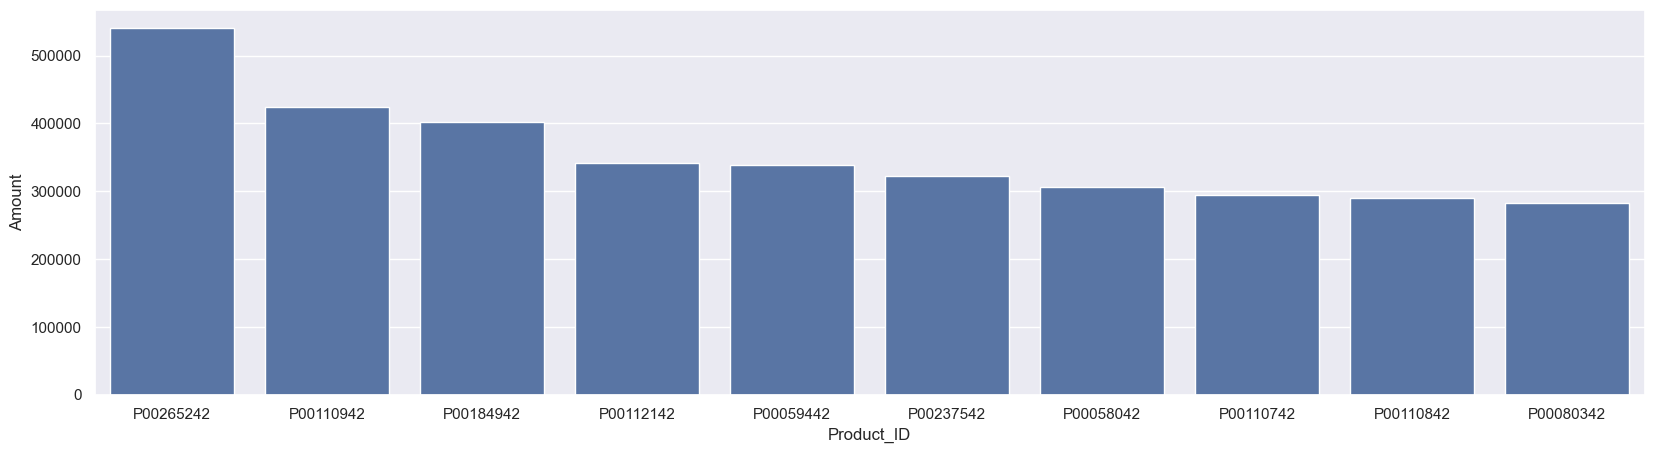

In [66]:
sales_state=df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID',y='Amount',data=sales_state)

From the graph it shows that p00265242,p00110942,p00184942 are the top 3 revenue generating products

Insights Got by analysing the data

- Most of the buyers are Females
- Most of the buyers are of the age group 26-35
- Maximum number of orders and amount spend top 3 states are - Maharashtra,UP,Karnataka
- Unmarried Females spend maximum amount for orders
- Maximum amount spent by buyers from IT,Healthcare and aviation sector
- Food,clothing and Electronics are the maximum amount spent product category
- p00265242,p00110942,p00184942 are Top 3 revenue generating products